Importing necessary packages

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Data Loading

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 2s 0us/step


We can list the directories with the following terminal command:

In [5]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


We'll now assign variables with the proper file path for the training and validation sets.

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Understanding our data

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## Setting  Model Parameters

In [9]:
BATCH_SIZE = 100
IMG_SHAPE = 150

## Data Augmentation

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Flipping the images horizontally

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


See the transformation

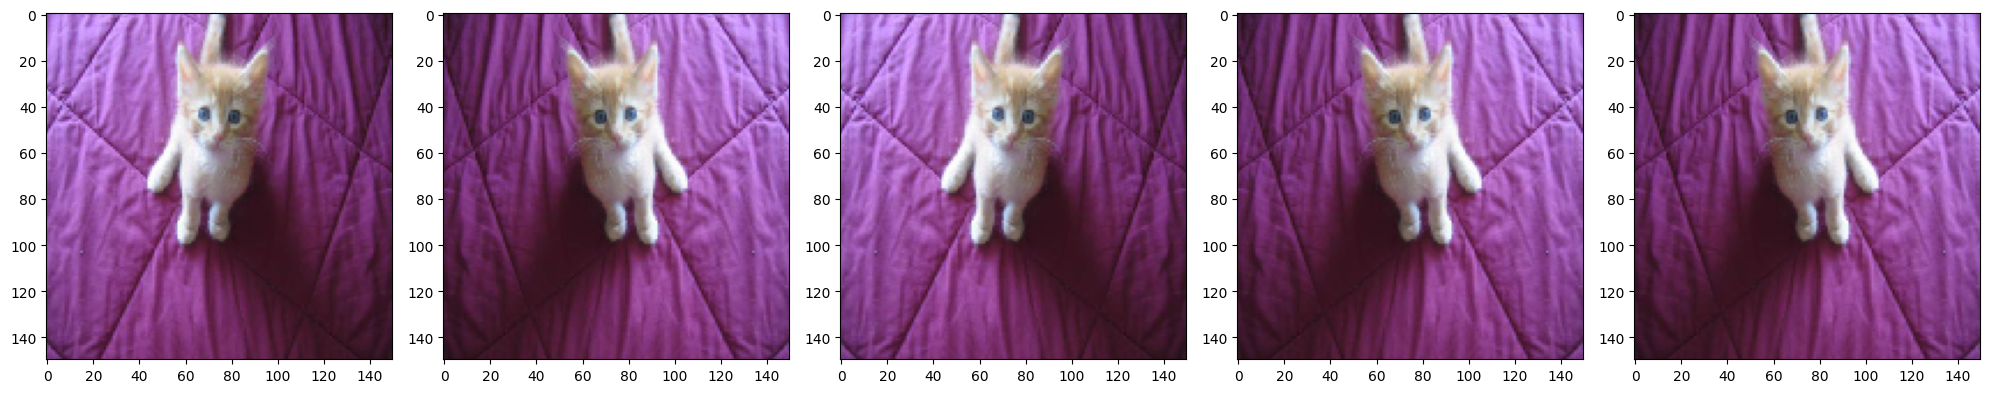

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Rotating the image

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [25]:
[train_data_gen[0][0][0] for i in range(5)]

[array([[[0.13026328, 0.13026328, 0.13026328],
         [0.14017306, 0.14017306, 0.14017306],
         [0.13725491, 0.13725491, 0.13725491],
         ...,
         [0.1326088 , 0.1208441 , 0.10123625],
         [0.1316846 , 0.11991989, 0.10031204],
         [0.13076039, 0.11899568, 0.09938784]],
 
        [[0.120097  , 0.120097  , 0.120097  ],
         [0.14202148, 0.14202148, 0.14202148],
         [0.13725491, 0.13725491, 0.13725491],
         ...,
         [0.1318681 , 0.11887523, 0.0986533 ],
         [0.13556491, 0.12072363, 0.09957751],
         [0.13926174, 0.12257205, 0.10050172]],
 
        [[0.10993072, 0.10993072, 0.10993072],
         [0.14386989, 0.14386989, 0.14386989],
         [0.13725491, 0.13725491, 0.13725491],
         ...,
         [0.15164508, 0.13103   , 0.10649335],
         [0.16365977, 0.14119628, 0.11481121],
         [0.17567447, 0.15136255, 0.12312908]],
 
        ...,
 
        [[0.2886311 , 0.21804287, 0.16314091],
         [0.29232794, 0.2217397 , 0.16683

See the Transformation

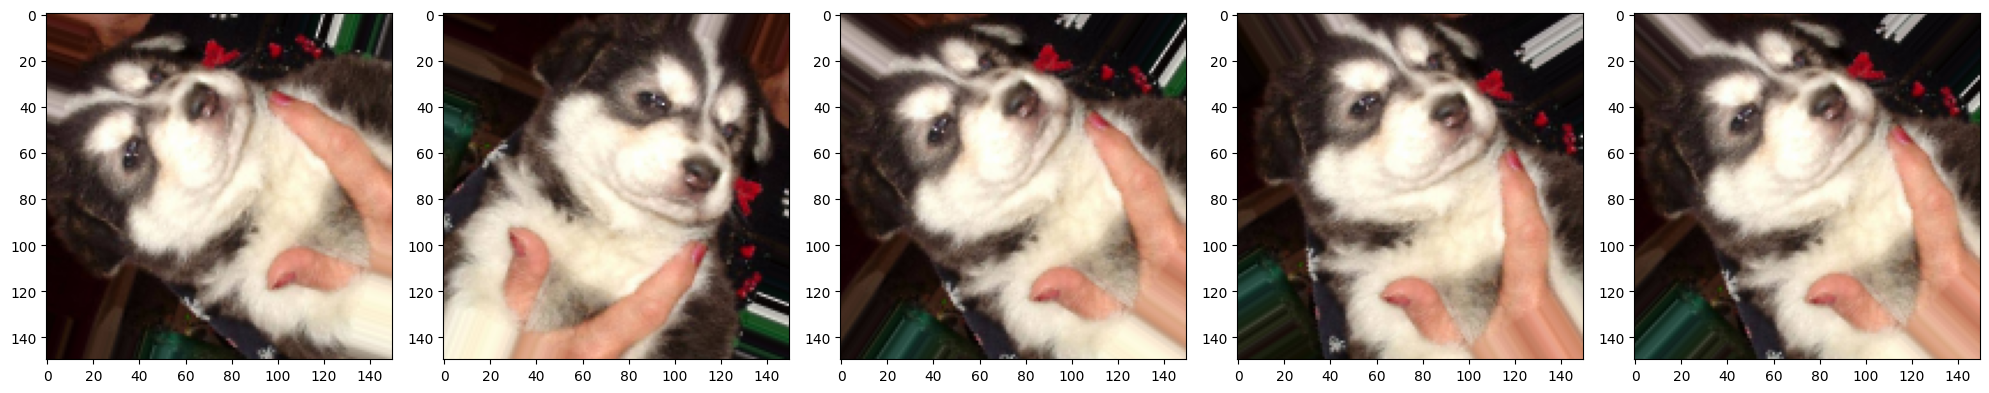

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying Zoom

In [32]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


See the transformation

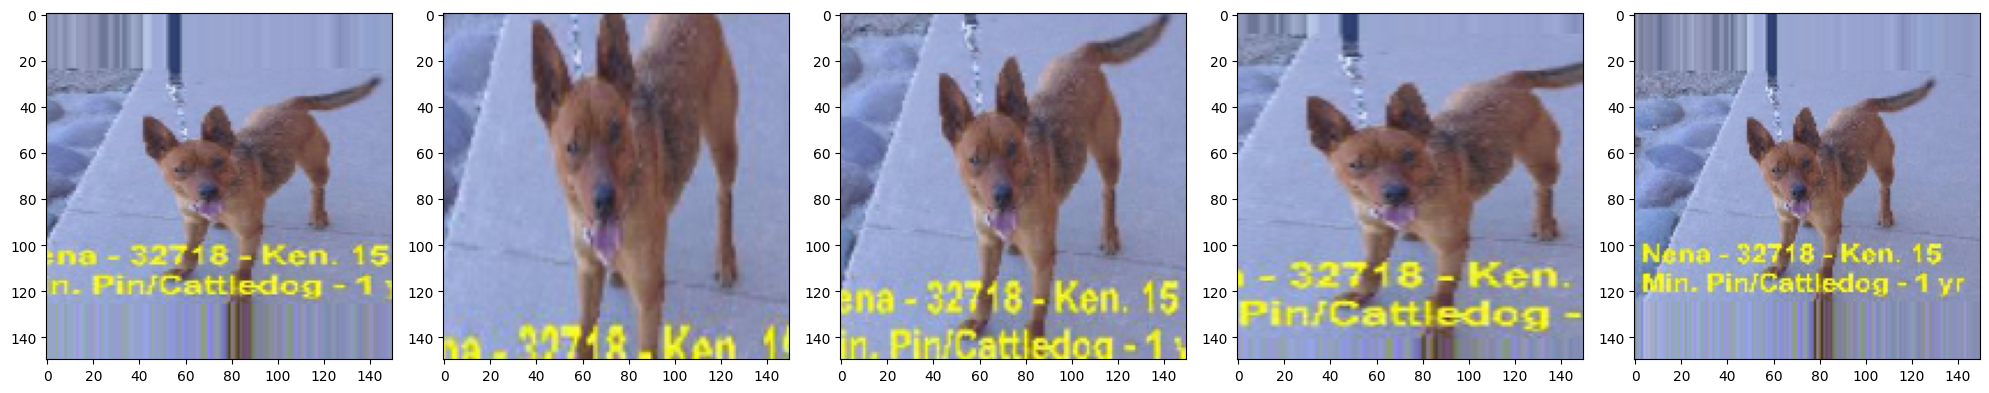

In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Putiing all transformations together

In [34]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


visualize transformation

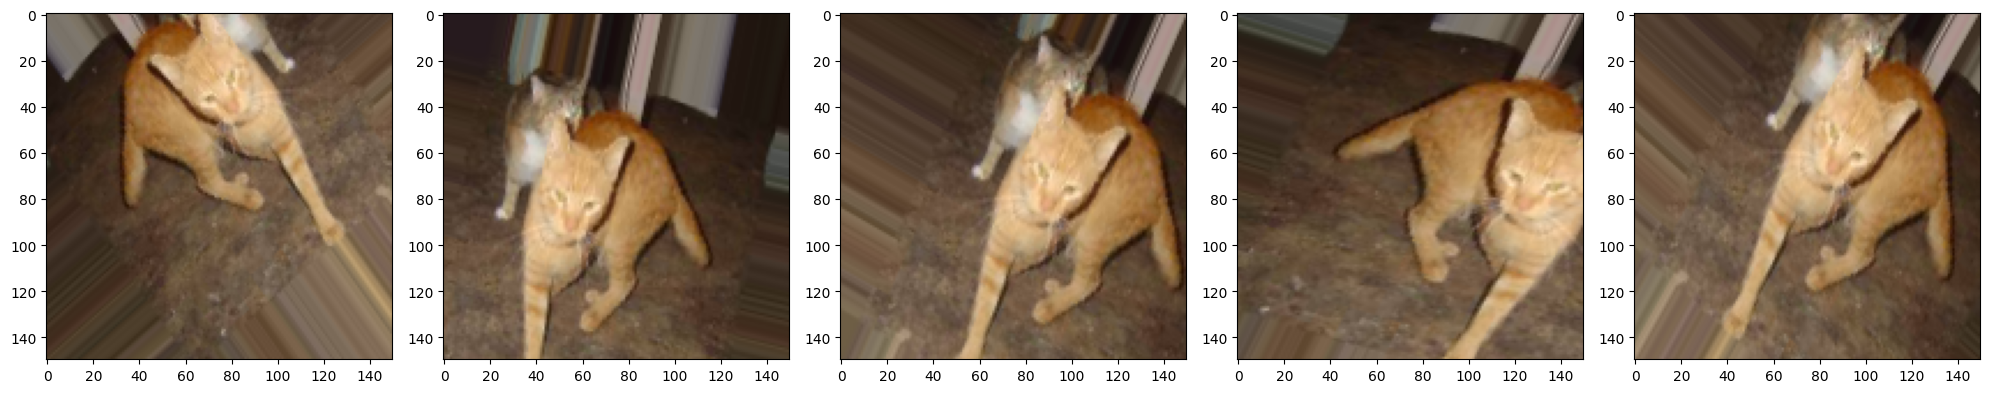

In [35]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Creating Validation Data generator

In [36]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Model Creation

Define the model


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(2)

])

Compile the model

In [39]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Train the model

In [41]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-41-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 33s 1s/step - loss: 0.7043 - accuracy: 0.5005 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 21s 1s/step - loss: 0.6937 - accuracy: 0.5080 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 22s 1s/step - loss: 0.6892 - accuracy: 0.5355 - val_loss: 0.6744 - val_accuracy: 0.6100
Epoch 4/100
20/20 [==============================] - 20s 1s/step - loss: 0.6783 - accuracy: 0.5840 - val_loss: 0.6574 - val_accuracy: 0.5720
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 0.6723 - accuracy: 0.5775 - val_loss: 0.6614 - val_accuracy: 0.5800
Epoch 6/100
20/20 [==============================] - 20s 1s/step - loss: 0.6564 - accuracy: 0.6265 - val_loss: 0.6346 - val_accuracy: 0.6490
Epoch 7/100
20/20 [==============================] - 21s 1s/step - loss: 0.6555 - accuracy: 0.6075 - val_loss: 0.6242 - val_accuracy: 0.6740
Epoch 8/100
2

We'll now visualize the results we get after training our network.

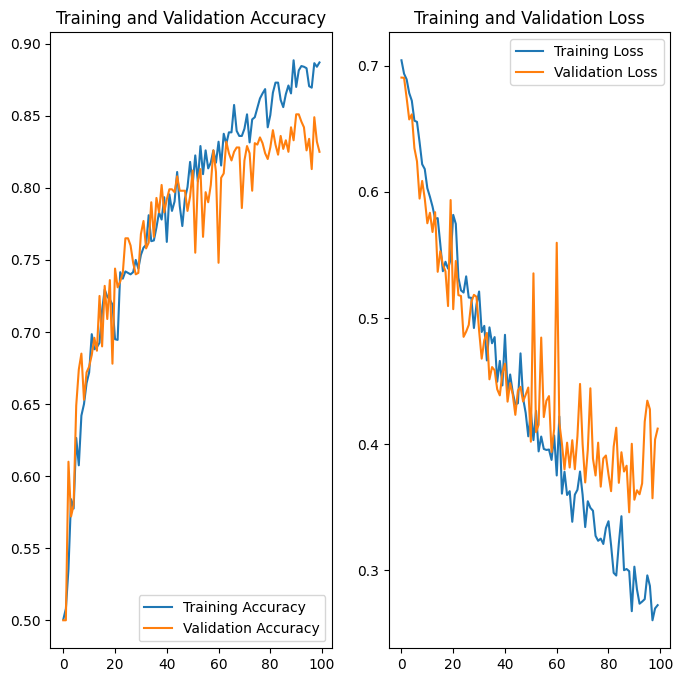

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Here we can see that training and validation parameters are moving hand in hand.Wheather its a Accuracy or loss for both training and validation those are near about same for all epochs. SO we minimized overfitting with image augmentation and dropout.